In [268]:
import numpy as np # type: ignore
from scipy.optimize import curve_fit # type: ignore
import matplotlib.pyplot as plt # type: ignore
import csv

In [270]:

def read_csv_file(filename):
  """Reads a CSV file with three rows and returns each row as a separate array.

  Args:
    filename: The name of the CSV file to read.

  Returns:
    A list of arrays, where each array represents a row in the CSV file.
  """

  rows = []
  with open(filename, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
      rows.append(row)

  if len(rows) != 3:
    raise ValueError("CSV file must have exactly 3 rows.")

  return rows



In [271]:
def write_data_to_csv(data, output_filename):
    """Writes a 2D array to a CSV file with a header row.

    Args:
        data: A 2D NumPy array containing the data.
        output_filename: The path to the output CSV file.
    """

    with open(output_filename, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(data)




In [272]:
def func(x, a, b, c, d):
    #return a * np.cos(c + x * b) + d
    return a*np.cos((x*b)+c)+d
    return d*(x**3)+a*(x**2)+b*x+c


def fit_model(theta_data, sensor_value_data):
    """Fits the model f(theta) = a*cos(c+(theta*b))+d to the data and returns the coefficients.

    Args:
        theta_data: A list of theta values.
        sensor_value_data: A list of sensor values.

    Returns:
        A tuple containing the calculated coefficients a, b, c, and d.
    """
    # Initial guess for coefficients
    p0 = [22, 0.03, 0.35, 22.45]

    # Fit the curve
    popt, _ = curve_fit(func, theta_data, sensor_value_data, p0)

    return popt


['of0.txt', 'of1.txt', 'of2.txt', 'of3.txt', 'of4.txt', 'of5.txt', 'of6.txt', 'of7.txt', 'of8.txt', 'of9.txt']
Coefficients:
a = 22.522155450164753
b = 0.03221681450749973
c = 0.3070233064496007
d = 22.5861529788068


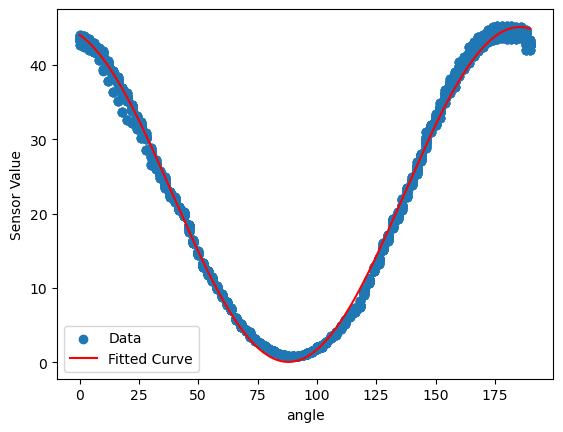

[1.808133366992972, 1.808133366992972, 1.808133366992972, 2.132927937388826, 2.132927937388826, 2.132927937388826, 2.132927937388826, 2.1492043024654333, 2.1492043024654333, 2.1492043024654333, 2.1492043024654333, 1.771341847526455, 1.771341847526455, 1.771341847526455, 1.771341847526455, 2.1680169024706553, 2.1680169024706553, 2.1680169024706553, 2.1680169024706553, 3.411420313124493, 3.411420313124493, 3.411420313124493, 3.411420313124493, 3.709051120629609, 3.709051120629609, 3.709051120629609, 3.709051120629609, 3.9328602387797886, 3.9328602387797886, 3.9328602387797886, 3.9328602387797886, 4.202742845038824, 4.202742845038824, 4.202742845038824, 4.202742845038824, 4.679609756431187, 4.679609756431187, 4.679609756431187, 4.679609756431187, 4.813762169446927, 4.813762169446927, 4.813762169446927, 4.813762169446927, 3.4472514473889233, 3.4472514473889233, 3.4472514473889233, 3.4472514473889233, 2.2981117943202305, 2.2981117943202305, 2.2981117943202305, 2.2981117943202305, 2.77345948

In [274]:
if __name__ == "__main__":
    filenames =filepaths(0,9)
    print(filenames)
    
    theta_data, sensor_value_data = read_csv_file("")

    a,b,c,d = fit_model(theta_data, sensor_value_data)



    theta_plot = np.linspace(min(theta_data), max(theta_data), 10000)

    # Calculate predicted sensor values


    print("Coefficients:")
    print("a =", a)
    print("b =", b)
    print("c =", c)
    print("d =", d)

    sensor_value_pred = func(theta_plot, a,b,c,d)

    sensor_std = calculate_stdev(theta_data, sensor_value_data)

    # Plot the data and the fitted curve
    plt.scatter(theta_data, sensor_value_data, label="Data")
    plt.plot(theta_plot, sensor_value_pred, label="Fitted Curve", color='red')
    plt.xlabel("angle")
    plt.ylabel("Sensor Value")
    plt.legend()
    plt.show()
    print(sensor_std)